# Importing Libraries and reading data

In [283]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import scipy
import plotly.io as pio
import warnings

warnings.simplefilter(action='ignore')
pio.templates["plotly_dark"].layout.colorway = px.colors.qualitative.Set2
pio.templates.default = "plotly_dark" 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [192]:
data = pd.read_csv(r"G:\ds\Sample - Superstore.csv",encoding="latin-1")

In [193]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Data Wrangling

In [195]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [196]:
data.duplicated().sum()

0

In [197]:
data.duplicated(subset=["Order ID","Product ID","Order Date","Ship Date"]).sum()

8

In [198]:
data[data.duplicated(subset=["Order ID","Product ID","Order Date"],keep=False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
350,351,CA-2016-129714,9/1/2016,9/3/2016,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,24.56,2,0.00,11.54
352,353,CA-2016-129714,9/1/2016,9/3/2016,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,49.12,4,0.00,23.09
430,431,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,408.74,7,0.20,76.64
431,432,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,291.96,5,0.20,54.74
1300,1301,CA-2016-137043,12/23/2016,12/25/2016,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,Virginia,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",572.76,6,0.00,166.10
1301,1302,CA-2016-137043,12/23/2016,12/25/2016,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,Virginia,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",286.38,3,0.00,83.05
3183,3184,CA-2017-152912,11/9/2017,11/12/2017,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,Maryland,21044,East,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,1633.14,9,0.00,473.61
3184,3185,CA-2017-152912,11/9/2017,11/12/2017,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,Maryland,21044,East,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,544.38,3,0.00,157.87
3405,3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.37,2,0.30,-12.06
3406,3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.37,2,0.30,-12.06


I have no idea why there are duplicated orders but with different quantities and profit are present but they are only 16 rows so might as well remove them

In [199]:
data = data.drop_duplicates(subset=["Order ID","Product ID","Order Date"],keep=False)

### Creating a new column from the order and shipping dates columns

In [200]:
data["Order Date"] = pd.to_datetime(data.loc[:,"Order Date"])
data["Ship Date"] = pd.to_datetime(data.loc[:,"Ship Date"])

C:\Users\diask\AppData\Local\Temp\ipykernel_7792\2025180764.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\diask\AppData\Local\Temp\ipykernel_7792\2025180764.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9978 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9978 non-null   int64         
 1   Order ID       9978 non-null   object        
 2   Order Date     9978 non-null   datetime64[ns]
 3   Ship Date      9978 non-null   datetime64[ns]
 4   Ship Mode      9978 non-null   object        
 5   Customer ID    9978 non-null   object        
 6   Customer Name  9978 non-null   object        
 7   Segment        9978 non-null   object        
 8   Country        9978 non-null   object        
 9   City           9978 non-null   object        
 10  State          9978 non-null   object        
 11  Postal Code    9978 non-null   int64         
 12  Region         9978 non-null   object        
 13  Product ID     9978 non-null   object        
 14  Category       9978 non-null   object        
 15  Sub-Category   9978 non-nu

In [202]:
data["Lead time"] = (data["Ship Date"]-data["Order Date"]).dt.days

C:\Users\diask\AppData\Local\Temp\ipykernel_7792\957152199.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [203]:
data["year"]=data.loc[:,"Order Date"].dt.year
data['year_month'] = data['Order Date'].dt.strftime('%Y-%m')

C:\Users\diask\AppData\Local\Temp\ipykernel_7792\3501014317.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\diask\AppData\Local\Temp\ipykernel_7792\3501014317.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [204]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Lead time,year,year_month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,3,2016,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,3,2016,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,4,2016,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,7,2015,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,7,2015,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10,2,2014,2014-01
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63,5,2017,2017-02
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39,5,2017,2017-02
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32,5,2017,2017-02


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9978 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9978 non-null   int64         
 1   Order ID       9978 non-null   object        
 2   Order Date     9978 non-null   datetime64[ns]
 3   Ship Date      9978 non-null   datetime64[ns]
 4   Ship Mode      9978 non-null   object        
 5   Customer ID    9978 non-null   object        
 6   Customer Name  9978 non-null   object        
 7   Segment        9978 non-null   object        
 8   Country        9978 non-null   object        
 9   City           9978 non-null   object        
 10  State          9978 non-null   object        
 11  Postal Code    9978 non-null   int64         
 12  Region         9978 non-null   object        
 13  Product ID     9978 non-null   object        
 14  Category       9978 non-null   object        
 15  Sub-Category   9978 non-nu

In [206]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Lead time,year
count,9978.00,9978,9978,9978.00,9978.00,9978.00,9978.00,9978.00,9978.00,9978.00
mean,4999.05,2016-04-29 22:05:42.032471296,2016-05-03 21:06:31.822008576,55221.93,229.71,3.79,0.16,28.57,3.96,2015.72
min,1.00,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.00,0.44,1.00,0.00,-6599.98,0.00,2014.00
25%,2501.25,2015-05-22 06:00:00,2015-05-26 06:00:00,23223.00,17.22,2.00,0.00,1.73,3.00,2015.00
50%,4999.50,2016-06-26 00:00:00,2016-06-29 00:00:00,57103.00,54.33,3.00,0.20,8.64,4.00,2016.00
75%,7495.75,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.00,209.77,5.00,0.20,29.32,5.00,2017.00
max,9994.00,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.00,22638.48,14.00,0.80,8399.98,7.00,2017.00
std,2884.35,NaN,NaN,32069.74,623.55,2.22,0.21,234.39,1.75,1.12


In [207]:
data.describe(include="object")

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,year_month
count,9978,9978,9978,9978,9978,9978,9978,9978,9978,9978,9978,9978,9978,9978
unique,5007,4,793,793,3,1,531,49,4,1862,3,17,1850,48
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,TEC-AC-10003832,Office Supplies,Binders,Staple envelope,2017-12
freq,14,5960,37,37,5187,9978,913,2001,3201,18,6018,1521,48,460


In [208]:
data["Country"].unique()

array(['United States'], dtype=object)

#### Store seems to only operate in the US so might as well remove the country column

### Removing unnecessary columns

In [209]:
data = data.drop(columns=["Product ID","Customer Name","Row ID","Postal Code","Country","Ship Date"])

# EDA

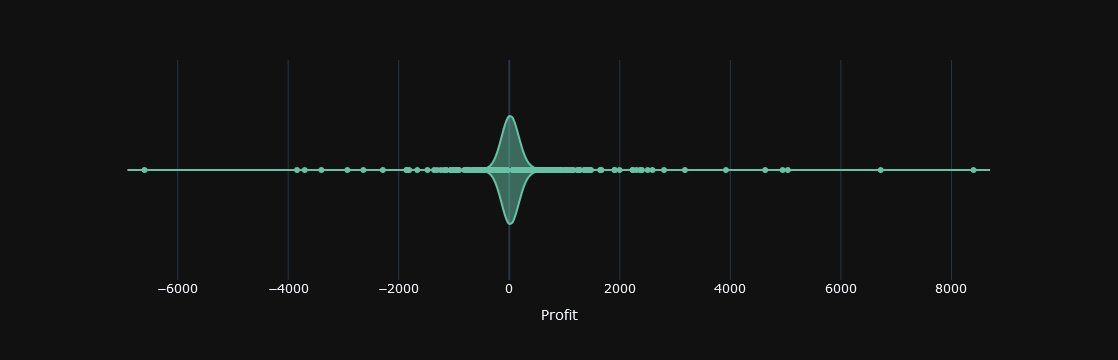

In [210]:
iplot(px.violin(data_frame=data,x="Profit"))

In [211]:
data.query("Profit>6000")

,Order ID,Order Date,Ship Mode,Customer ID,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Lead time,year,year_month
6826,CA-2016-118689,2016-10-02,Standard Class,TC-20980,Corporate,Lafayette,Indiana,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.00,8399.98,7,2016,2016-10
8153,CA-2017-140151,2017-03-23,First Class,RB-19360,Consumer,Seattle,Washington,West,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.00,6719.98,2,2017,2017-03


In [212]:
data.query("Profit<0")

,Order ID,Order Date,Ship Mode,Customer ID,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Lead time,year,year_month
3,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,7,2015,2015-10
14,US-2015-118983,2015-11-22,Standard Class,HP-14815,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.81,5,0.80,-123.86,4,2015,2015-11
15,US-2015-118983,2015-11-22,Standard Class,HP-14815,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.54,3,0.80,-3.82,4,2015,2015-11
23,US-2017-156909,2017-07-16,Second Class,SF-20065,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.37,2,0.30,-1.02,2,2017,2017-07
27,US-2015-150630,2015-09-17,Standard Class,TB-21520,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.43,7,0.50,-1665.05,4,2015,2015-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,CA-2016-149272,2016-03-15,Standard Class,MY-18295,Corporate,Bryan,Texas,Central,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.39,7,0.80,-35.82,4,2016,2016-03
9921,CA-2014-111360,2014-11-24,Standard Class,AT-10435,Home Office,Akron,Ohio,East,Office Supplies,Binders,Acco Expandable Hanging Binders,5.74,3,0.70,-4.59,6,2014,2014-11
9931,CA-2015-104948,2015-11-13,Standard Class,KH-16510,Consumer,San Bernardino,California,West,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.33,4,0.15,-40.20,4,2015,2015-11
9937,CA-2016-164889,2016-06-03,Second Class,CP-12340,Corporate,Los Angeles,California,West,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.09,2,0.20,-1.78,3,2016,2016-06


In [213]:
data.query("Profit < 0 & Discount == 0")

,Order ID,Order Date,Ship Mode,Customer ID,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Lead time,year,year_month


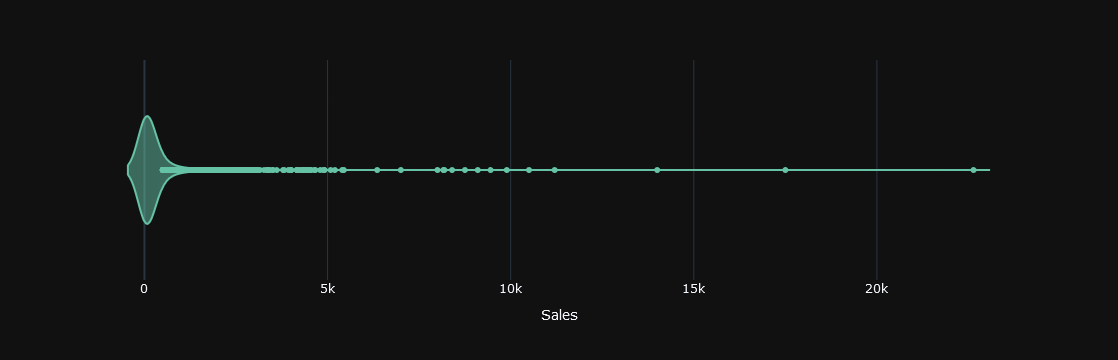

In [214]:
iplot(px.violin(data_frame=data,x="Sales"))

In [215]:
data.query("Sales > 10000")

,Order ID,Order Date,Ship Mode,Customer ID,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Lead time,year,year_month
2623,CA-2017-127180,2017-10-22,First Class,TA-21385,Home Office,New York City,New York,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97,4,0.20,3919.99,2,2017,2017-10
2697,CA-2014-145317,2014-03-18,Standard Class,SM-20320,Home Office,Jacksonville,Florida,South,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.50,-1811.08,5,2014,2014-03
4190,CA-2017-166709,2017-11-17,Standard Class,HL-15040,Consumer,Newark,Delaware,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.00,5039.99,5,2017,2017-11
6826,CA-2016-118689,2016-10-02,Standard Class,TC-20980,Corporate,Lafayette,Indiana,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.00,8399.98,7,2016,2016-10
8153,CA-2017-140151,2017-03-23,First Class,RB-19360,Consumer,Seattle,Washington,West,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.00,6719.98,2,2017,2017-03


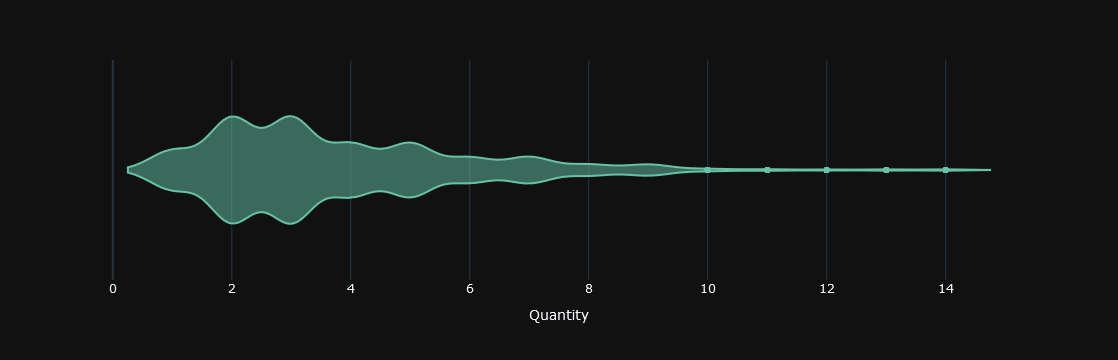

In [216]:
iplot(px.violin(data_frame=data,x="Quantity"))

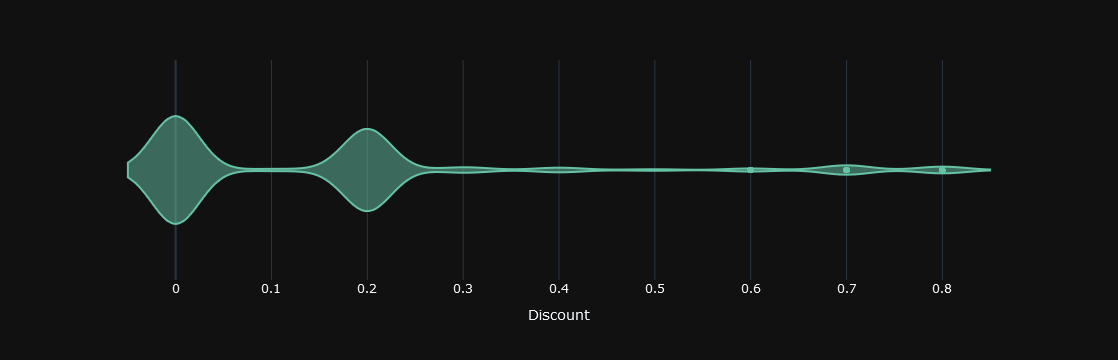

In [217]:
iplot(px.violin(data_frame=data,x="Discount"))

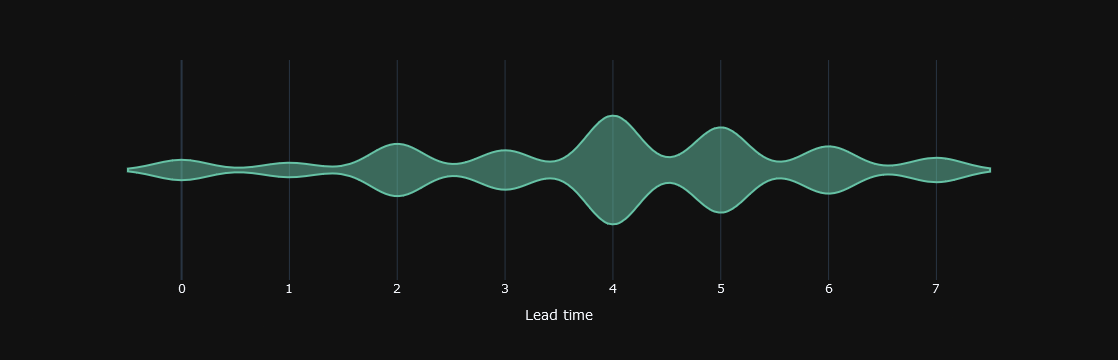

In [218]:
iplot(px.violin(data_frame=data,x="Lead time"))

In [219]:
print(f"Number of Unique Orders is {data["Order ID"].nunique()}")

Number of Unique Orders is 5007


In [220]:
print(f"Number of Unique Products is {data["Product Name"].nunique()}")

Number of Unique Products is 1850


In [221]:
print(f"Number of Unique Customers is {data["Customer ID"].nunique()}")

Number of Unique Customers is 793


In [222]:
print(f"Number of categories is {data["Category"].nunique()} and sub-categories is {data["Sub-Category"].nunique()}")

Number of categories is 3 and sub-categories is 17


In [223]:
print(f"The total profit for this data of the super store is {sum(data["Profit"])}")

The total profit for this data of the super store is 285078.2003


In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9978 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9978 non-null   object        
 1   Order Date    9978 non-null   datetime64[ns]
 2   Ship Mode     9978 non-null   object        
 3   Customer ID   9978 non-null   object        
 4   Segment       9978 non-null   object        
 5   City          9978 non-null   object        
 6   State         9978 non-null   object        
 7   Region        9978 non-null   object        
 8   Category      9978 non-null   object        
 9   Sub-Category  9978 non-null   object        
 10  Product Name  9978 non-null   object        
 11  Sales         9978 non-null   float64       
 12  Quantity      9978 non-null   int64         
 13  Discount      9978 non-null   float64       
 14  Profit        9978 non-null   float64       
 15  Lead time     9978 non-null   int64        

# Regions and States Analysis

In [225]:
df_regions = data.groupby("Region")[["Profit","Sales","Order ID","Lead time"]].agg({
    "Profit":"sum",
    "Sales":"sum",
    "Order ID": 'count',
    "Lead time": "mean"
}).reset_index()
df_regions.columns = ['Region', 'Profit', 'Sales','Number of Orders','Lead time']
df_regions

,Region,Profit,Sales,Number of Orders,Lead time
0,Central,39706.36,501239.89,2323,4.06
1,East,90880.79,675967.30,2842,3.91
2,South,46097.23,389571.47,1612,3.96
3,West,108393.82,725278.74,3201,3.93


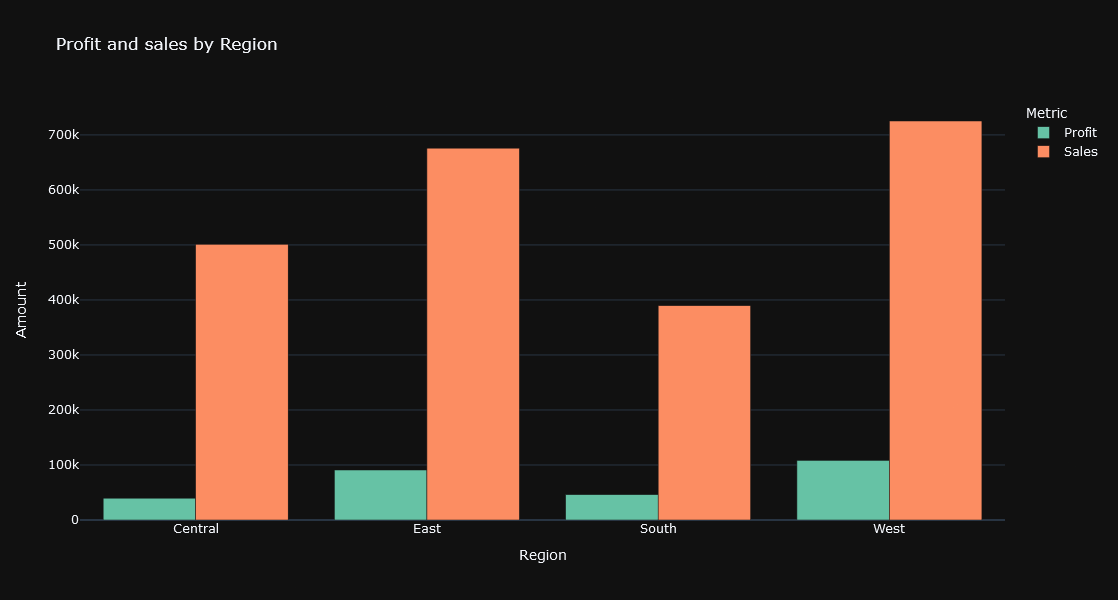

In [226]:
fig = px.bar(df_regions, 
             x='Region', 
             y=['Profit', 'Sales'],
             title='Profit and sales by Region',
             labels={'value': 'Amount', 'Region': 'Region', 'variable': 'Metric'},
             barmode='group',
             height=600)

# Update layout for better readability
fig.update_layout(legend_title_text='Metric')

# Show the figure
fig.show()

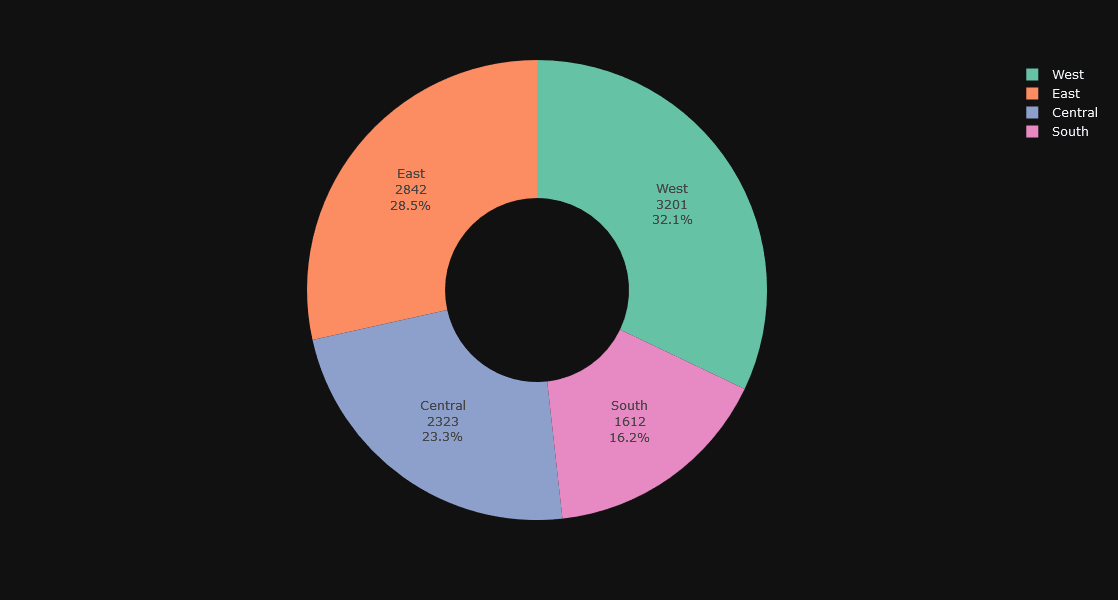

In [227]:
fig = px.pie(data_frame=df_regions,names="Region",values="Number of Orders",height=600,hole=0.4)

fig.update_traces(textinfo='label+value+percent')

fig.show()

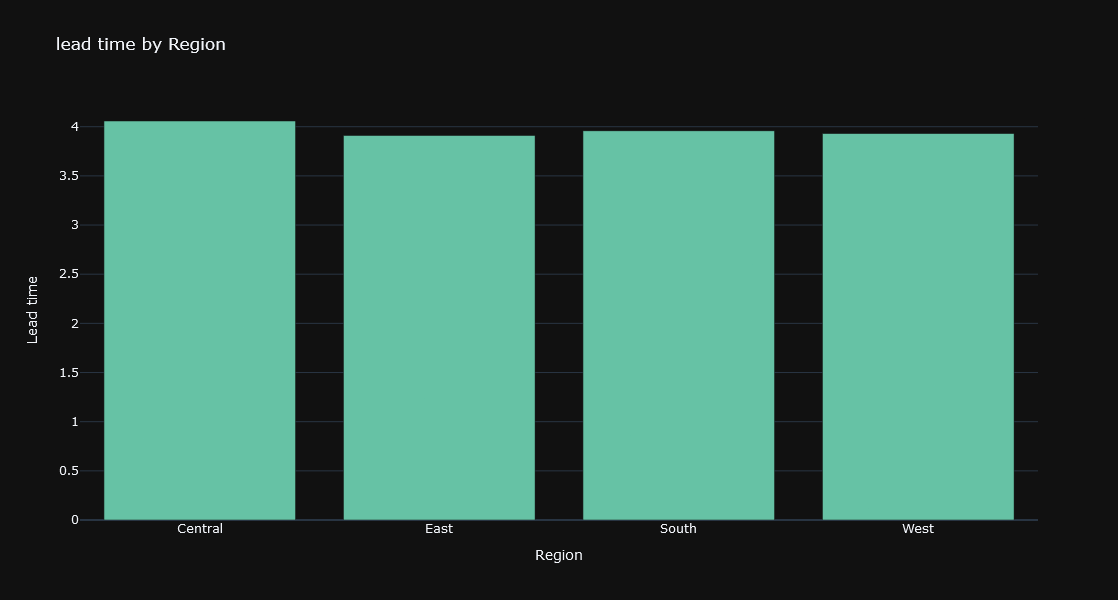

In [228]:
fig = px.bar(df_regions, 
             x='Region', 
             y='Lead time',
             title='lead time by Region',
             height=600)

# Update layout for better readability
fig.update_layout(legend_title_text='Metric')

# Show the figure
fig.show()

#### The best region in terms of profit to sales ratio is East and the region with most profit is west while central and south aren't doing too well with central having the least profit
#### It is worth noting that the lead time for the Central region seems to be higher than every other region

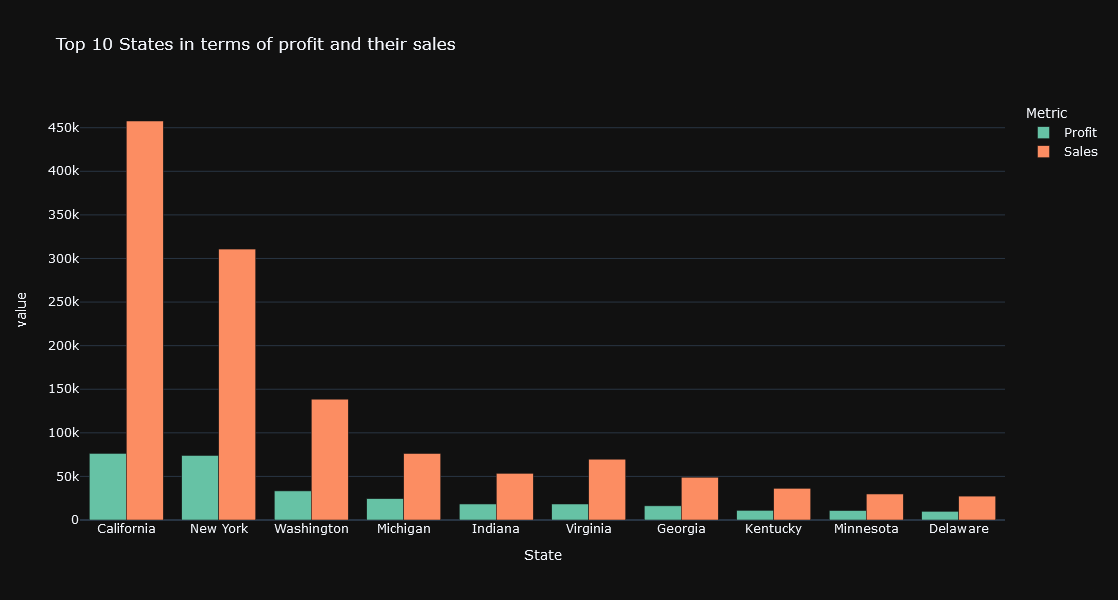

In [229]:
states = data.groupby("State")[["Profit","Sales","Order ID"]].agg({'Profit':'sum','Sales':'sum','Order ID':'count'})\
.sort_values(by="Profit",ascending=False)\
.reset_index()[:10]

states.columns = ["State","Profit","Sales","Number of Orders"]
fig = px.bar(states,
            x= "State",
            y=["Profit","Sales"],
            title="Top 10 States in terms of profit and their sales",
            height=600,
            barmode="group")
fig.update_layout(legend_title_text='Metric')

fig.show()

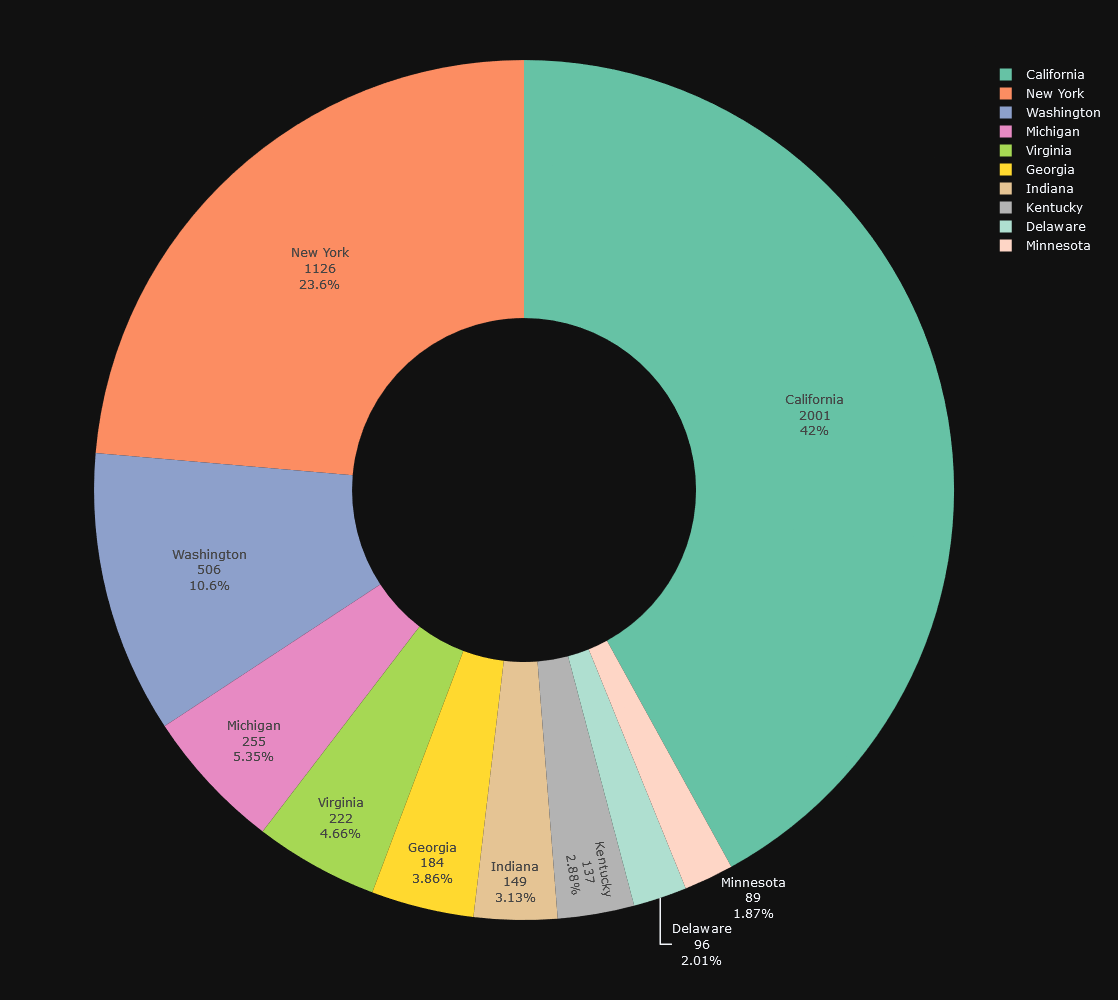

In [230]:
fig = px.pie(data_frame=states,names="State",values="Number of Orders",height=1000,hole=0.4)

fig.update_traces(textinfo='label+value+percent')

fig.show()

#### California had the most sales and profit but new york almost had the same profit with lower number of orders and sales, All other states had much lower sales than these 2

In [231]:
cities = data.groupby("City")[["Profit","Sales"]].agg({'Profit':'sum','Sales':'sum'})\
.sort_values(by="Profit",ascending=False)\
.reset_index()[:10]

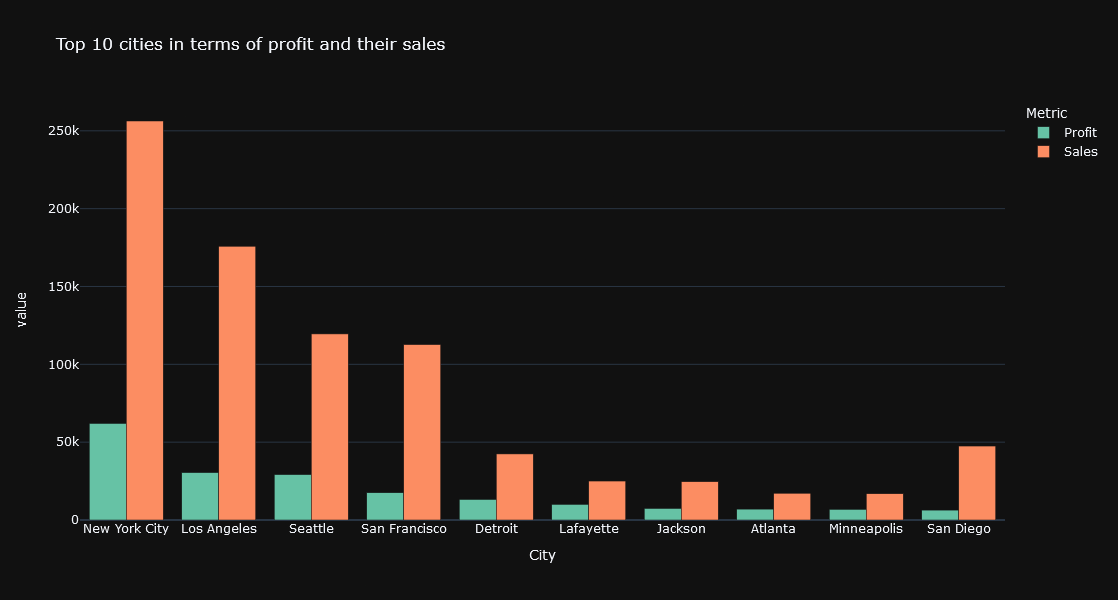

In [232]:
fig = px.bar(cities,
            x= "City",
            y=["Profit","Sales"],
            title="Top 10 cities in terms of profit and their sales",
            height=600,
            barmode="group")
fig.update_layout(legend_title_text='Metric')

fig.show()

#### New York City had the most profit doubling Los Angeles the second place as well as the highest profit to sales ratio

# Shipping Analysis

In [234]:
shipping = data.groupby("Ship Mode")[["Profit","Sales","Order ID","Lead time"]]\
.agg({'Profit':'sum','Sales':'sum','Order ID':'count','Lead time':'median'})\
.reset_index()

shipping['percentage'] = (shipping['Profit'] / shipping['Sales'] * 100).round(2)

shipping.columns = ['Ship Mode', 'Profit', 'Sales','Number of Orders','Lead time','Ratio of profit to sales']

shipping

,Ship Mode,Profit,Sales,Number of Orders,Lead time,Ratio of profit to sales
0,First Class,48935.21,351354.74,1536,2.00,13.93
1,Same Day,15891.76,128363.12,543,0.00,12.38
2,Second Class,56541.38,455977.82,1939,3.00,12.40
3,Standard Class,163709.85,1356361.71,5960,5.00,12.07


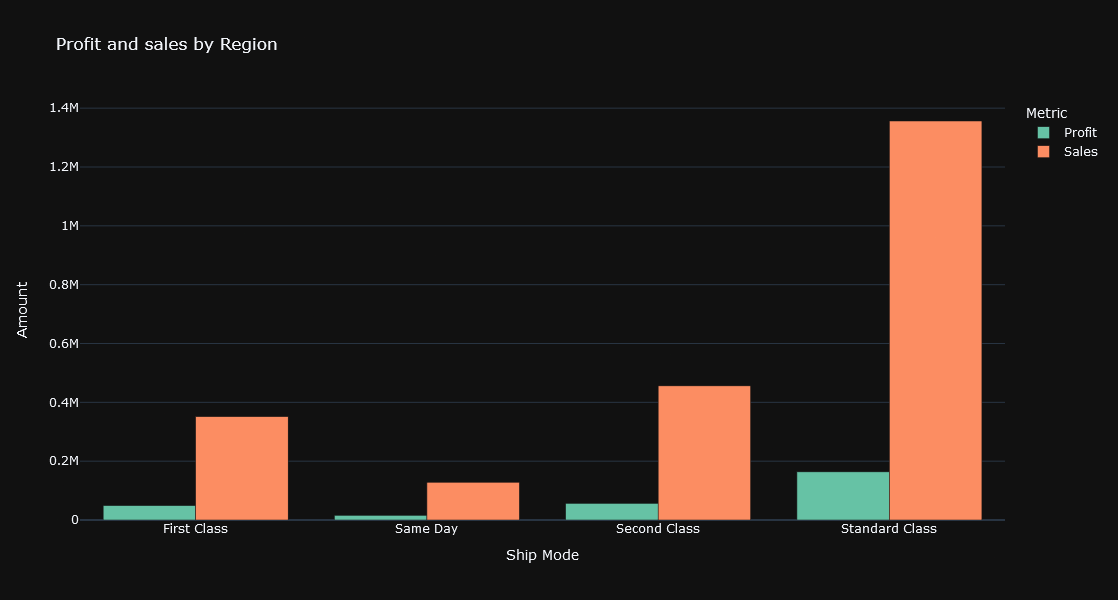

In [235]:
fig = px.bar(shipping, 
             x='Ship Mode', 
             y=['Profit', 'Sales'],
             title='Profit and sales by Region',
             labels={'value': 'Amount', 'Region': 'Region', 'variable': 'Metric'},
             barmode='group',
             height=600)

# Update layout for better readability
fig.update_layout(legend_title_text='Metric')

# Show the figure
fig.show()

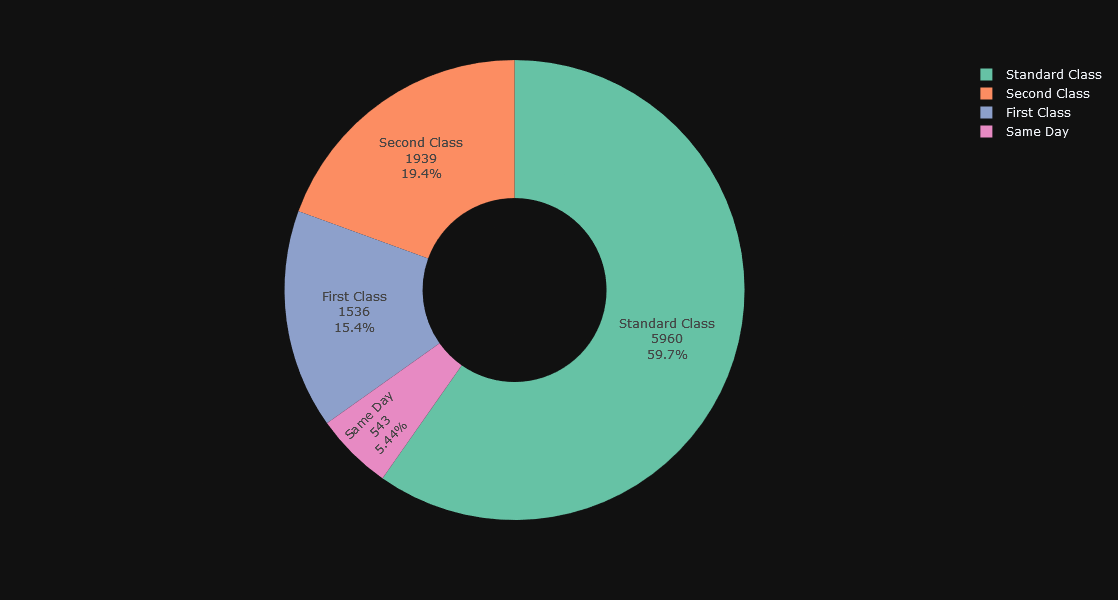

In [236]:
fig = px.pie(data_frame=shipping,names="Ship Mode",values="Number of Orders",height=600,hole=0.4)

fig.update_traces(textinfo='label+value+percent')

fig.show()

#### Standard class had the most profit but it is worth noting that First class had the highest profit to sales ratio

# Category and product Analysis

In [237]:
category = data.groupby("Category")[["Profit","Sales","Order ID"]]\
.agg({'Profit':'sum','Sales':'sum','Order ID':'count'})\
.reset_index()

category['percentage'] = (category['Profit'] / category['Sales'] * 100).round(2)

category.columns = ['Category', 'Profit', 'Sales','Number of Orders','Ratio of profit to sales']

category

,Category,Profit,Sales,Number of Orders,Ratio of profit to sales
0,Furniture,18226.24,740577.91,2117,2.46
1,Office Supplies,121553.02,716205.24,6018,16.97
2,Technology,145298.94,835274.24,1843,17.40


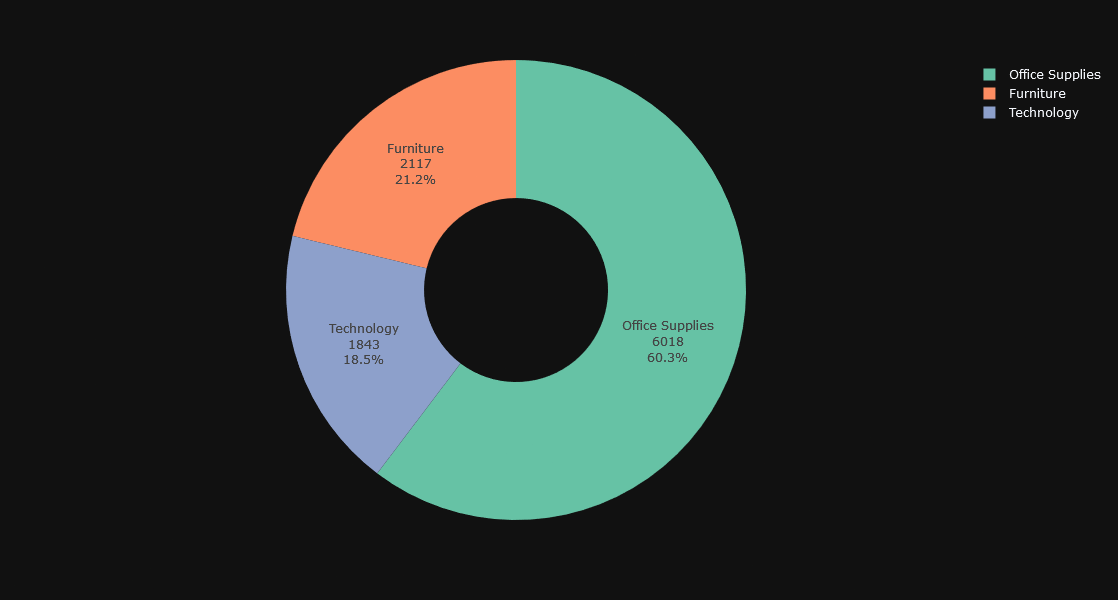

In [238]:
fig = px.pie(data_frame=category,names="Category",values="Number of Orders",height=600,hole=0.4)

fig.update_traces(textinfo='label+value+percent')

fig.show()

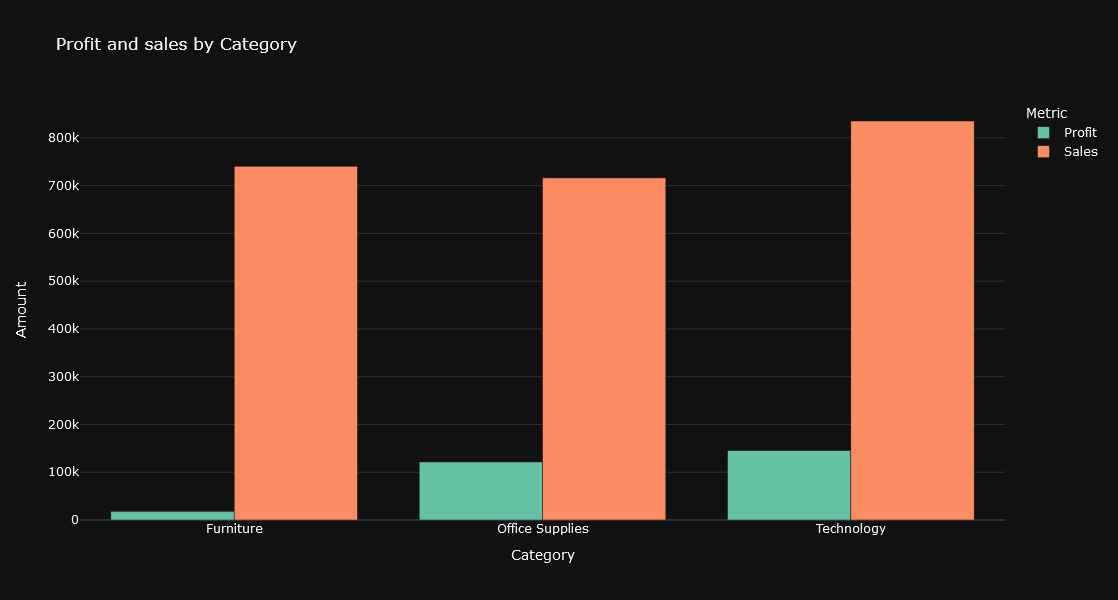

In [239]:
fig = px.bar(category, 
             x='Category', 
             y=['Profit', 'Sales'],
             title='Profit and sales by Category',
             labels={'value': 'Amount', 'Region': 'Region', 'variable': 'Metric'},
             barmode='group',
             height=600)

# Update layout for better readability
fig.update_layout(legend_title_text='Metric')

# Show the figure
fig.show()

In [240]:
sub_cats = data.groupby("Sub-Category")[["Profit","Sales"]].agg({'Profit':'sum','Sales':'sum'})\
.sort_values(by="Profit",ascending=False)\
.reset_index()[:10]

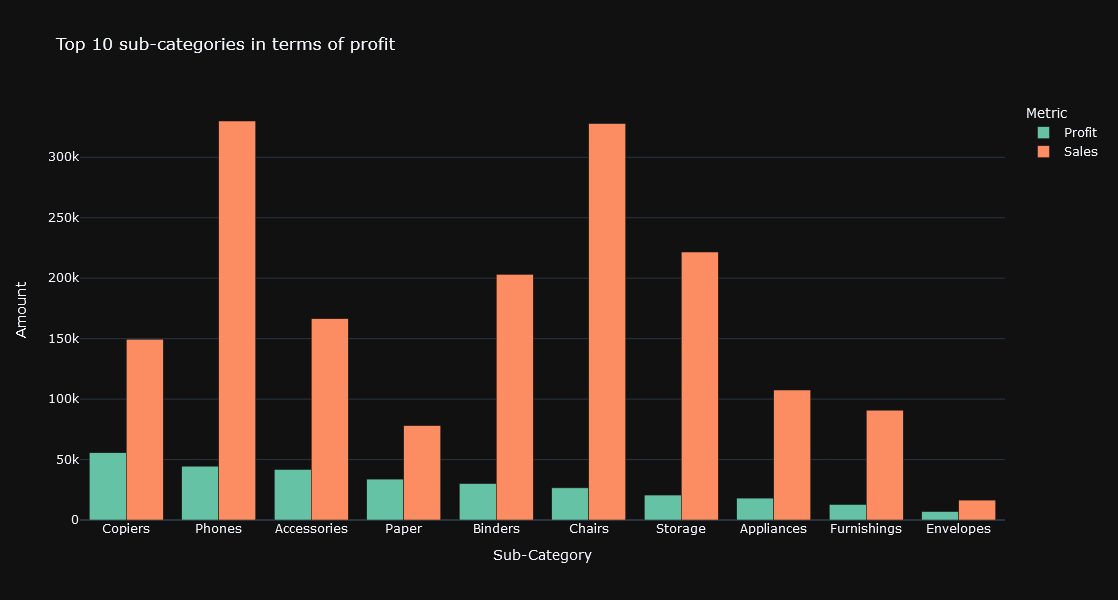

In [241]:
fig = px.bar(sub_cats, 
             x='Sub-Category', 
             y=['Profit', 'Sales'],
             title='Top 10 sub-categories in terms of profit',
             labels={'value': 'Amount', 'Region': 'Region', 'variable': 'Metric'},
             barmode='group',
             height=600)

# Update layout for better readability
fig.update_layout(legend_title_text='Metric')

# Show the figure
fig.show()

In [242]:
products = data.groupby("Product Name")[["Profit","Sales","Quantity"]].agg({'Profit':'sum','Sales':'sum','Quantity':'sum'})\
.sort_values(by="Profit",ascending=False)\
.reset_index()[:10]

In [243]:
products

,Product Name,Profit,Sales,Quantity
0,Canon imageCLASS 2200 Advanced Copier,25199.93,61599.82,20
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.04,27453.38,31
2,Hewlett Packard LaserJet 3310 Copier,6983.88,18839.69,38
3,Canon PC1060 Personal Laser Copier,4570.93,11619.83,19
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.98,18374.90,12
5,Ativa V4110MDD Micro-Cut Shredder,3772.95,7699.89,11
6,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.97,14299.89,11
7,Plantronics Savi W720 Multi-Device Wireless He...,3696.28,9367.29,24
8,Ibico EPK-21 Electric Binding System,3345.28,15875.92,13
9,Zebra ZM400 Thermal Label Printer,3343.54,6965.70,6


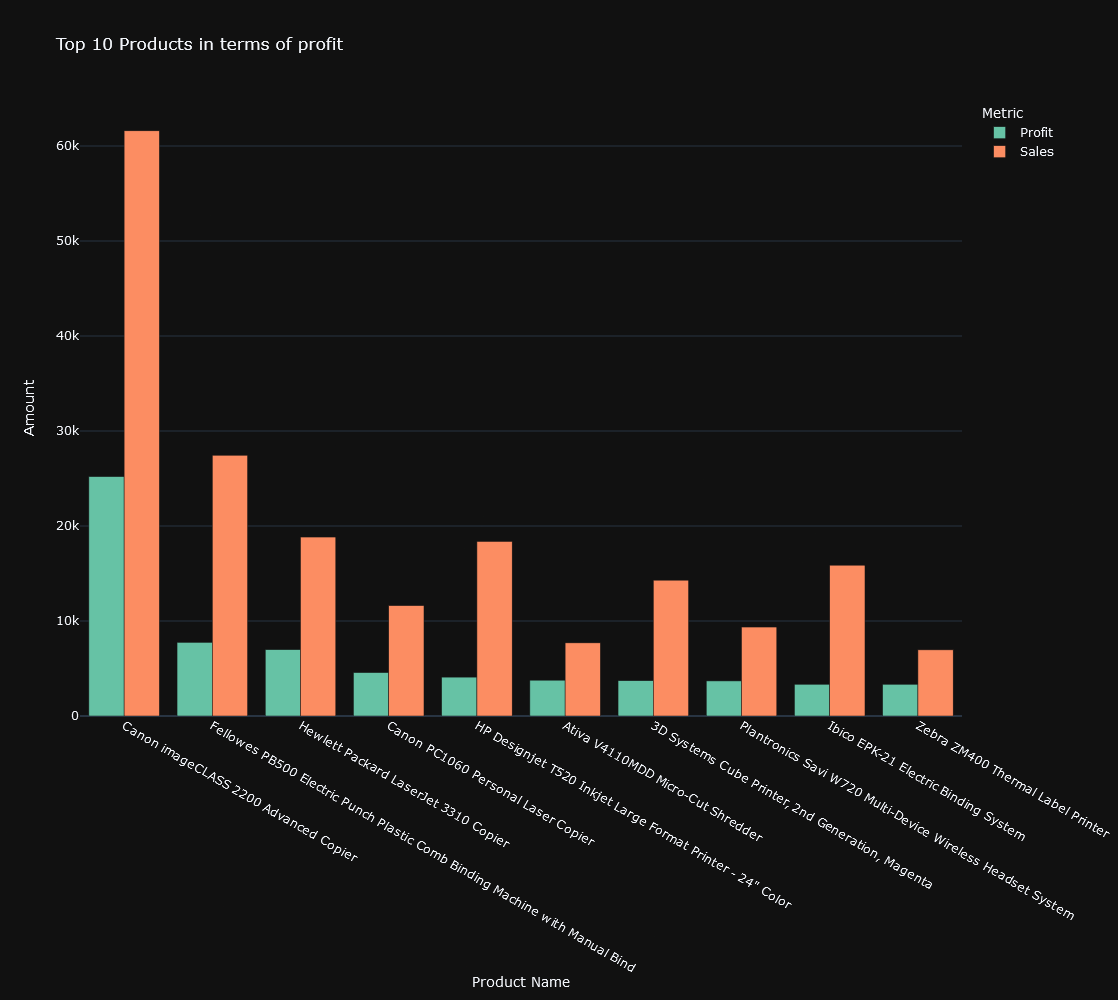

In [244]:
fig = px.bar(products, 
             x='Product Name', 
             y=['Profit', 'Sales'],
             title='Top 10 Products in terms of profit',
             labels={'value': 'Amount', 'Region': 'Region', 'variable': 'Metric'},
             barmode='group',
             height=1000)

# Update layout for better readability
fig.update_layout(legend_title_text='Metric')

# Show the figure
fig.show()

In [245]:
data.groupby("Product Name")[["Quantity","Profit"]].sum()\
.reset_index()\
.sort_values(by="Quantity",ascending = False)[:10]

,Product Name,Quantity,Profit
1499,Staples,215,292.20
1493,Staple envelope,170,751.63
537,Easy-staple paper,150,1096.03
1500,Staples in misc. colors,86,124.05
942,KI Adjustable-Height Table,74,-248.48
259,Avery Non-Stick Binders,71,43.55
1511,Storex Dura Pro Binders,71,50.55
699,GBC Premium Transparent Covers with Diagonal L...,67,49.51
1450,"Situations Contoured Folding Chairs, 4/Set",64,234.23
1497,Staple-based wall hangings,62,121.99


# Progression of profit and sales over time

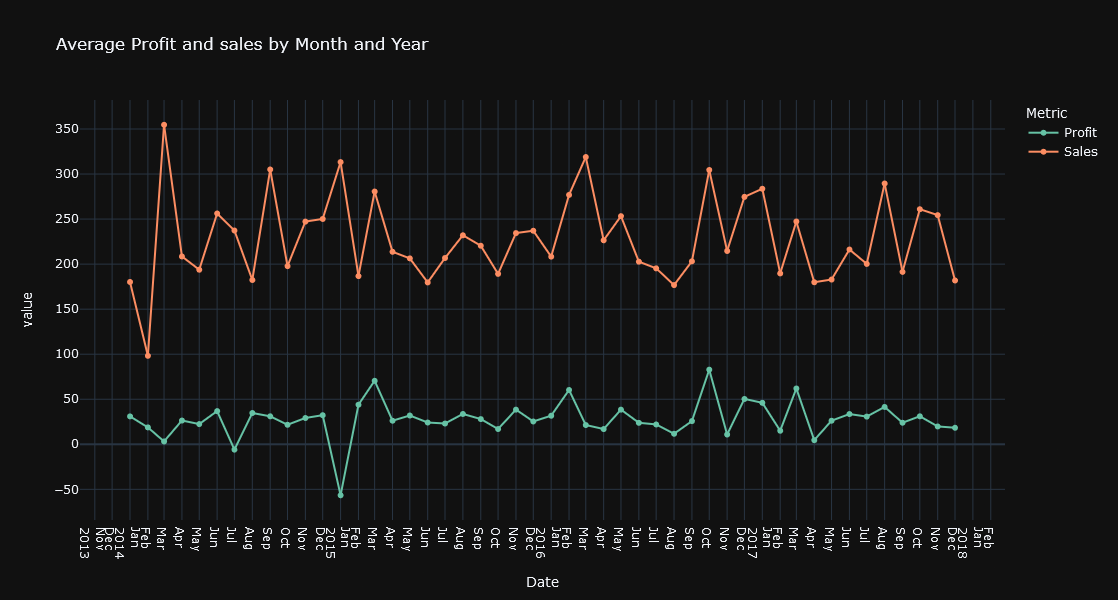

In [247]:
metric_over_time = data.groupby('year_month')[['Profit','Sales']].mean().reset_index()

# Convert 'year_month' to datetime for proper ordering
metric_over_time['date'] = pd.to_datetime(metric_over_time['year_month'] + '-01')

# Sort the data by date
metric_over_time = metric_over_time.sort_values('date')

# Create the line chart
fig = px.line(metric_over_time, 
              x='date', 
              y=['Profit','Sales'], 
              title='Average Profit and sales by Month and Year',
              labels={'date': 'Date', 'Profit': 'Average Profit'},
             markers=True,
             height=600)

# Customize the x-axis to show both year and month
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y"
)
fig.update_layout(legend_title_text='Metric')

# Show the plot
fig.show()

#### Profit and sales didn't realy change that much over time

In [280]:
df_discount = data.groupby("Discount")[["Profit","Order ID"]].agg({'Profit':'mean','Order ID':'count'})\
.reset_index()
df_discount

,Discount,Profit,Order ID
0,0.00,66.79,4788
1,0.10,96.06,94
2,0.15,27.29,52
3,0.20,24.69,3653
4,0.30,-45.98,225
5,0.32,-88.56,27
6,0.40,-111.93,206
7,0.45,-226.65,11
8,0.50,-310.70,66
9,0.60,-43.08,138


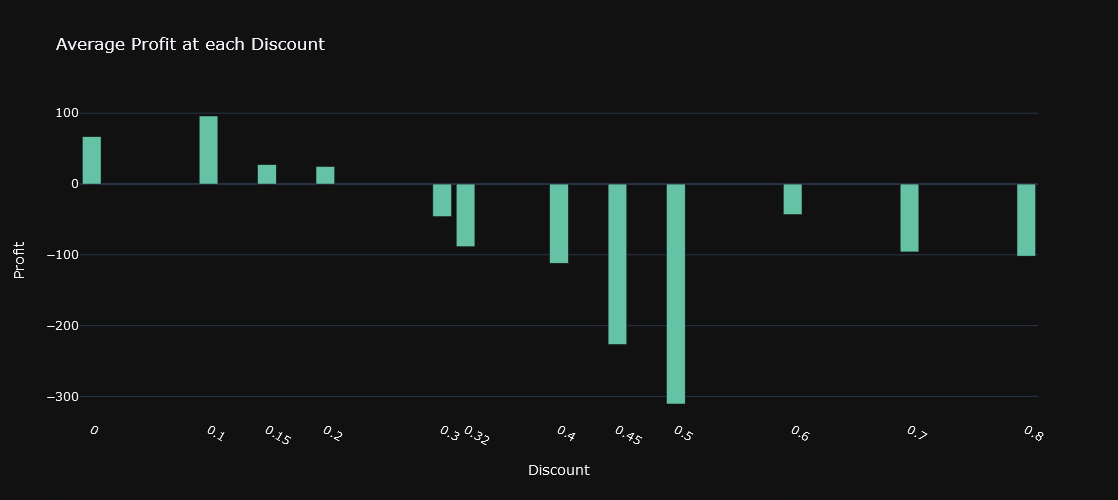

In [282]:
fig = px.bar(data_frame=df_discount,x="Discount",y="Profit",title="Average Profit at each Discount",height=500)

all_x_values = df_discount['Discount'].unique()

# Update x-axis to show all ticks
fig.update_xaxes(
    tickmode='array',
    tickvals=all_x_values,
    ticktext=all_x_values
)

fig.show()

#### Discounts past 0.2 has a negative average profit also 0.2 and 0 discounts has the most number of orders

# Customer Behaviour Clustering

In [250]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [251]:
data_customers = data.groupby("Customer ID")[['Sales', 'Quantity', 'Discount','Order ID', 'Profit']]\
.agg({'Sales':'sum','Quantity':'sum','Discount':'mean','Order ID':'count','Profit':'sum'})\
.reset_index()

In [252]:
data_customers

,Customer ID,Sales,Quantity,Discount,Order ID,Profit
0,AA-10315,5563.56,30,0.09,11,-362.88
1,AA-10375,1056.39,41,0.08,15,277.38
2,AA-10480,1790.51,36,0.02,12,435.83
3,AA-10645,5086.93,64,0.06,18,857.80
4,AB-10015,886.16,13,0.07,6,129.35
...,...,...,...,...,...,...
788,XP-21865,2374.66,100,0.05,28,621.23
789,YC-21895,5454.35,31,0.08,8,1305.63
790,YS-21880,6720.44,58,0.05,12,1778.29
791,ZC-21910,8025.71,105,0.25,31,-1032.15


In [253]:
features = data_customers[['Sales', 'Quantity', 'Discount', 'Order ID','Profit']]

In [254]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

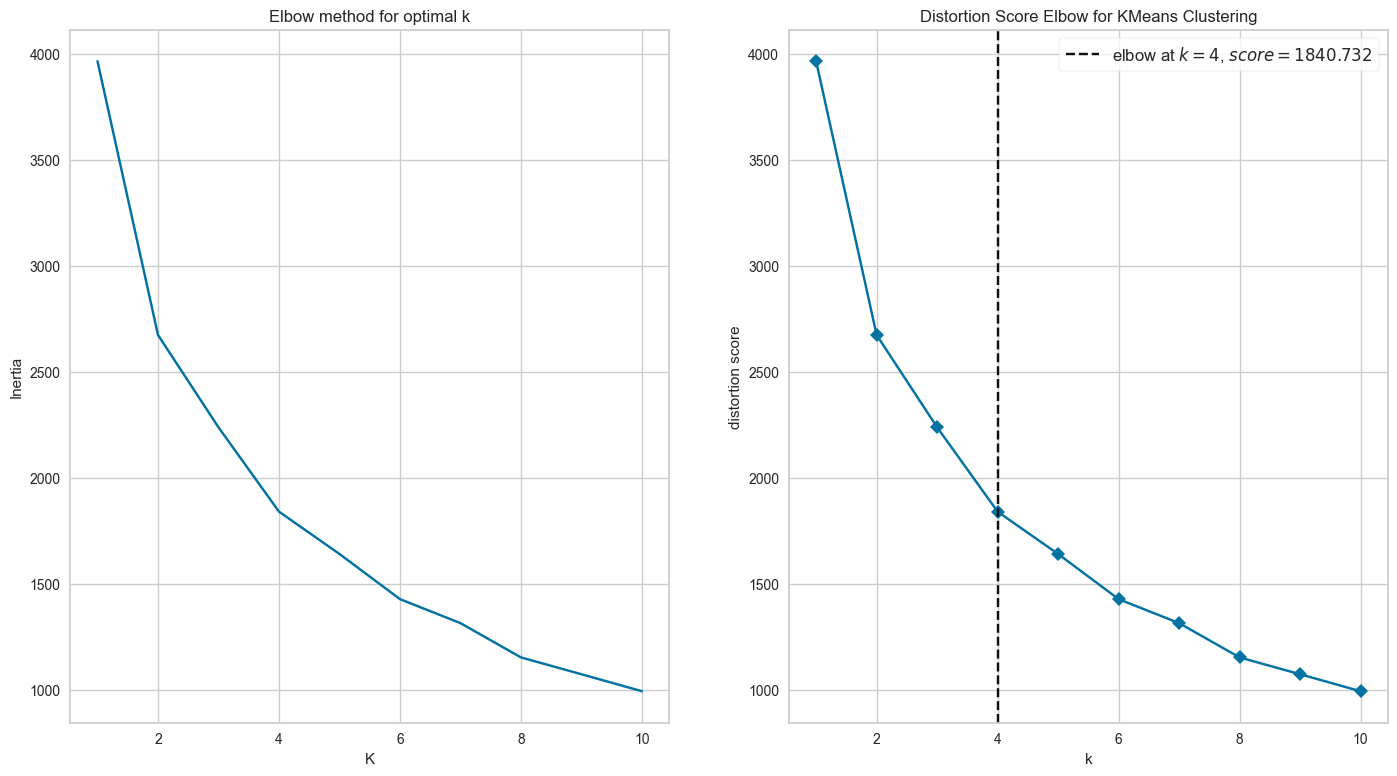

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [255]:
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters = k,random_state=7)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(17,9))    

plt.subplot(1,2,1)
sns.lineplot(x=K,y=inertia)
plt.title("Elbow method for optimal k")
plt.xlabel("K")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
model = KMeans(random_state=7)
elbow_visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
elbow_visualizer.fit(scaled_features)
elbow_visualizer.show()

In [256]:
kmeans = KMeans(n_clusters=4, random_state=7) 
kmeans.fit(scaled_features)

KMeans(n_clusters=4, random_state=7)

## Evaluating Clusters

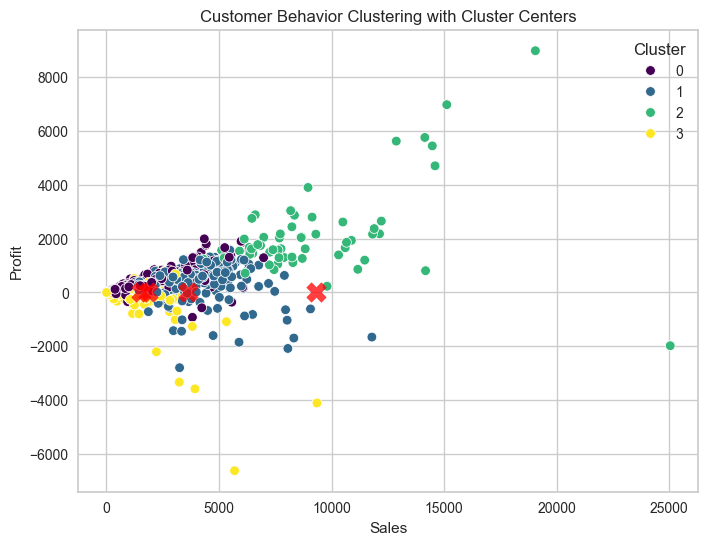

In [257]:
data_customers['Cluster'] = kmeans.labels_

# Visualize the clusters using Sales and Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=data_customers, palette='viridis', legend='full')

# Plot the cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Inverse transform to original scale
plt.scatter(centers[:, 0], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')  # Sales vs Profit

plt.title('Customer Behavior Clustering with Cluster Centers')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [258]:
score = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score for {kmeans.n_clusters} clusters: {score}')

Silhouette Score for 4 clusters: 0.27208204224107163


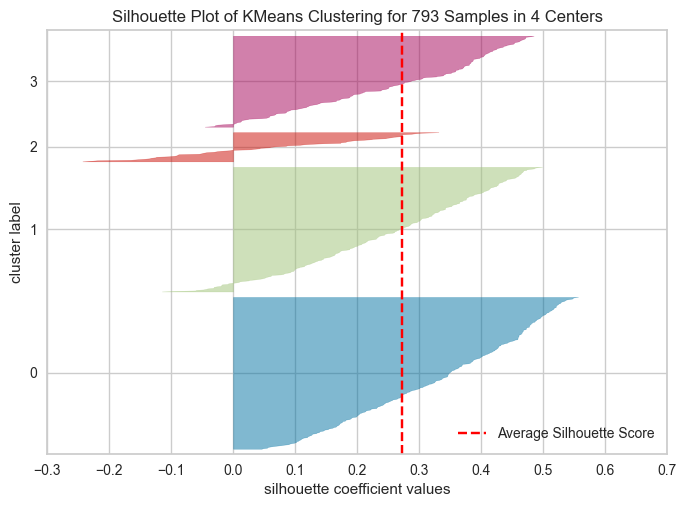

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 793 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [259]:
silhouette_visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
silhouette_visualizer.fit(scaled_features)
silhouette_visualizer.show()

In [260]:
cluster_summary = data_customers.groupby('Cluster')[['Sales', 'Quantity', 'Discount', 'Order ID','Profit']].mean()
print(cluster_summary)

          Sales  Quantity  Discount  Order ID  Profit
Cluster                                              
0       1868.23     33.62      0.10      9.13  335.97
1       3618.96     69.61      0.17     18.16  299.14
2       9294.07     80.08      0.13     20.41 2158.37
3       1519.30     30.45      0.26      8.15 -101.91


### Cluster Insights:-
####  &emsp;-The clusters divide customers into 4 groups, the most important of them is group 2 which the group with high sales and high profit and could
####  &emsp; be called the high paying customers and should be priority for retention and marketing.
####  &emsp;-group 0 had the high average discount and also a negative profit so these could be called discount chasers.
####  &emsp;-group 1 and 3 are the average customers with not so high of a profit or sales

# Discount Sensitivty clustering

In [261]:
data_orders = data.groupby("Order ID")[["Discount","Sales","Quantity","Profit"]]\
.agg({'Discount':'mean','Sales':'sum','Quantity':'sum','Profit':'sum'})\
.reset_index()

data_orders

,Order ID,Discount,Sales,Quantity,Profit
0,CA-2014-100006,0.00,377.97,3,109.61
1,CA-2014-100090,0.20,699.19,9,-19.09
2,CA-2014-100293,0.20,91.06,6,31.87
3,CA-2014-100328,0.20,3.93,1,1.33
4,CA-2014-100363,0.20,21.38,5,7.72
...,...,...,...,...,...
5002,US-2017-168802,0.20,18.37,4,5.97
5003,US-2017-169320,0.00,171.43,7,16.67
5004,US-2017-169488,0.00,56.86,7,26.56
5005,US-2017-169502,0.00,113.41,8,32.45


In [262]:
features = data_orders.loc[:,["Discount","Sales","Profit"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

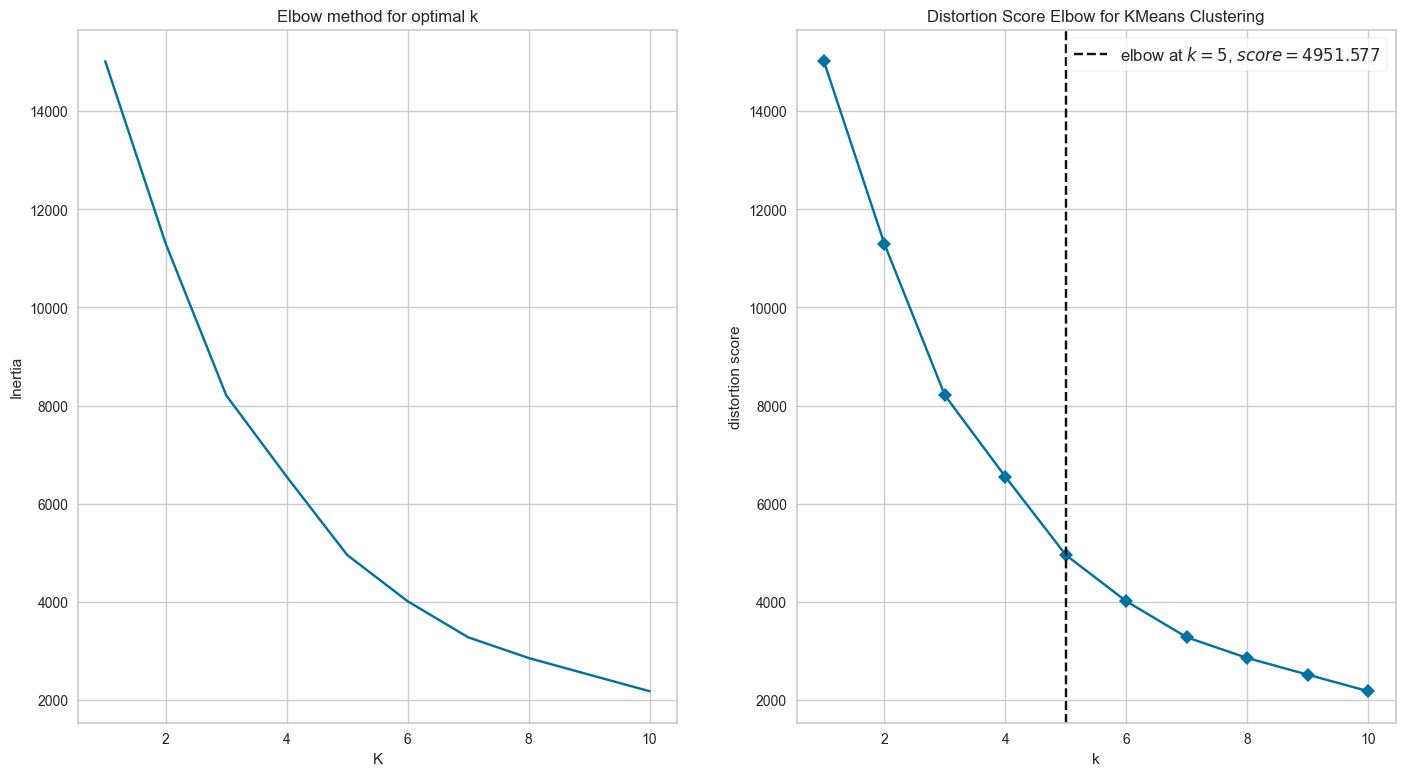

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [263]:
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters = k,random_state=7)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(17,9))    

plt.subplot(1,2,1)
sns.lineplot(x=K,y=inertia)
plt.title("Elbow method for optimal k")
plt.xlabel("K")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
model = KMeans(random_state=7)
elbow_visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
elbow_visualizer.fit(scaled_features)
elbow_visualizer.show()

In [270]:
kmeans = KMeans(n_clusters= 5,random_state=7)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=7)

## Evaluating Clusters

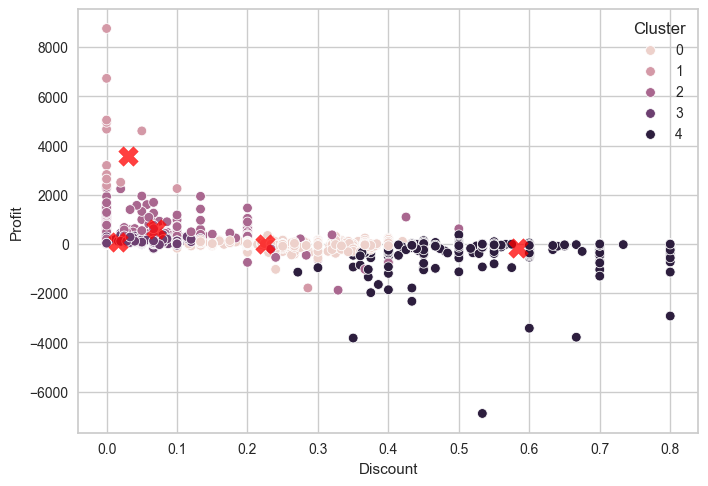

In [271]:
data_orders["Cluster"] = kmeans.labels_

sns.scatterplot(data=data_orders,x="Discount",y="Profit",hue="Cluster")

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0],centers[:,2] , c='red', s=200, alpha=0.75, marker='X')

In [272]:
score = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score for {kmeans.n_clusters} clusters: {score}')

Silhouette Score for 5 clusters: 0.508380569115559


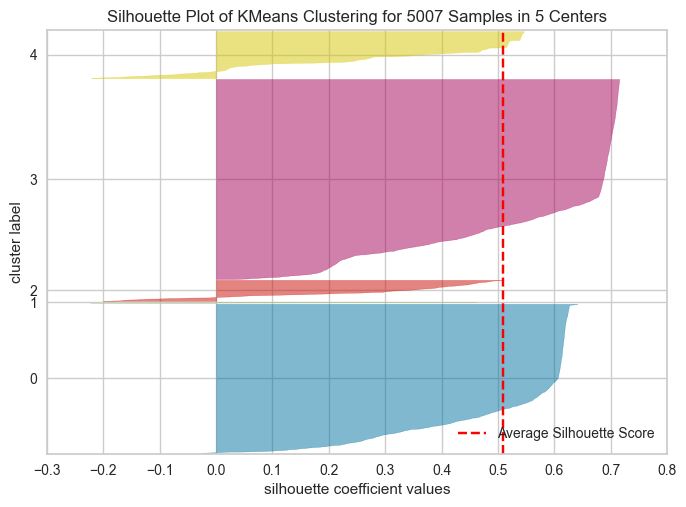

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5007 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [275]:
silhouette_visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
silhouette_visualizer.fit(scaled_features)
silhouette_visualizer.show()

In [274]:
cluster_summary = data_orders.groupby('Cluster')[['Sales', 'Discount','Profit']].mean()
print(cluster_summary)

           Sales  Discount  Profit
Cluster                           
0         311.61      0.22    5.61
1       10316.08      0.03 3573.53
2        2767.34      0.07  591.13
3         292.02      0.02   70.92
4         329.01      0.58 -172.65


### Clusters insights:-
####  &emsp; -Group 1 show high sales and low avg discount, this indicates willingness to buy without discount
####  &emsp; -Group 4 show low sales with high avg discount, this might indicate over-discounting with little impact on sales 